# Fully Connected

In [220]:
%matplotlib inline
#
from lrgsglib.core import *
from lrgsglib.core_plots import imshow_colorbar_caxdivider
from lrgsglib.core_utils import move_to_rootf, width_interval
from LRGSG_package.nx_patches import signed_spectral_layout, signedlaplacian_spectrum
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [225]:
side = 100
eigenmode = 0
#
themeanField = FullyConnected(side1 = side)
SLRG_obj = SignedLaplacianAnalysis(#
    system = themeanField,
    initCond = f'ground_state_{eigenmode}', #'
    pflip= 1-6e-4,
    t_steps = 10000,
    no_obs = 200
)
SLRG_obj.init_weights()
#
# neg_weightsG = {((i, j), (i, j+1)): -1 for i in range(SLRG_obj.system.side1) 
#                 for j in [SLRG_obj.system.side2//3, SLRG_obj.system.side2//2]}
# neg_weightsH = {(SLRG_obj.system.N//2, SLRG_obj.system.N//2+1): -1}
# SLRG_obj.flip_sel_edges(neg_weightsH, 'H')
#
# edges_to_flip = [(0, 1), (0, 2), (0, 3), (2, 5), (1, 12)]
# neg_weights = {e: -1 for e in edges_to_flip}
# SLRG_obj.flip_sel_edges(neg_weights)
#
SLRG_obj.flip_random_fract_edges()

In [226]:
SLRG_obj.laplacian_dynamics_init()
initial_array = SLRG_obj.status_array
# eigv, eigV = np.linalg.eigh(SLRG_obj.sLp.todense())
# (eigV.T[0]>0).sum()/side
#print(SLRG_obj.eigenModeInit, initial_array, SLRG_obj.eigV.T[0])

In [227]:
SLRG_obj.run_laplacian_dynamics(
    rescaled='field',
    saveFrames=True)

Beginning Laplacian dynamics.


  0%|          | 0/999999 [00:00<?, ?it/s]

Convergence reached.


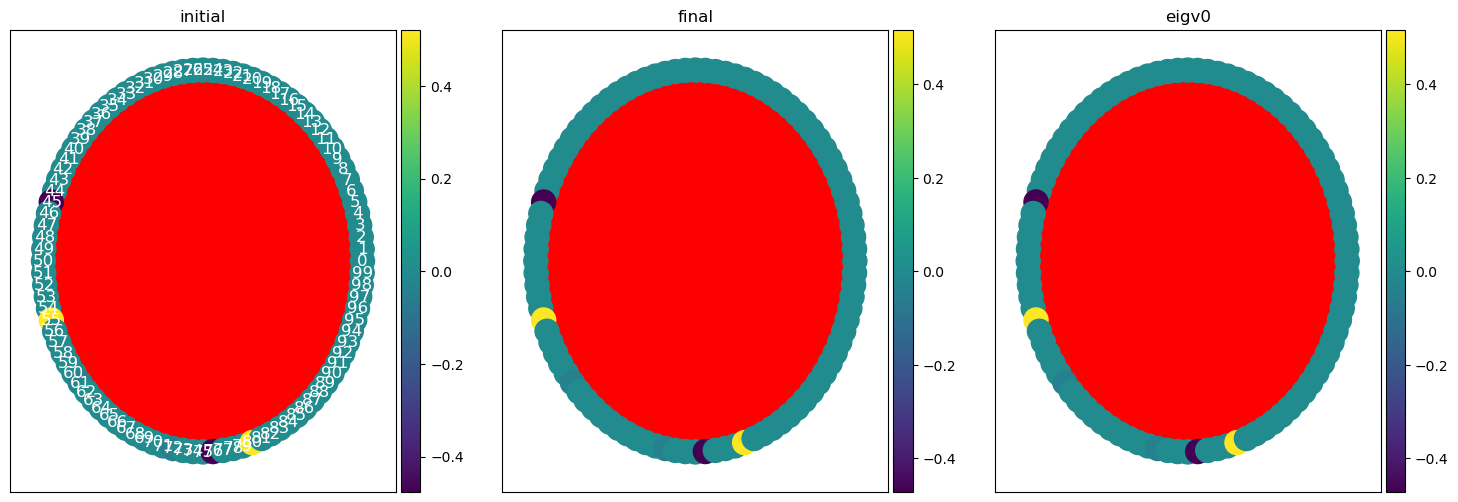

In [228]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6))
#
G = SLRG_obj.system.G
#
G_nodecol1 = initial_array
G_nodecol2 = SLRG_obj.status_array
G_nodecol3 = SLRG_obj.eigV.T[eigenmode]
G_edgecol = ['b' if e[2]>0 else 'r' for e in G.edges(data='weight')]
#
pos = nx.circular_layout(G)
# pos = signed_spectral_layout(G)
#
nodes1 = nx.draw_networkx_nodes(G, pos, ax=ax1, node_color=G_nodecol1)
nx.draw_networkx_labels(G, pos, ax=ax1, font_color='w')
edges = nx.draw_networkx_edges(G, pos=pos, ax=ax1, edge_color=G_edgecol)
#
nodes2 = nx.draw_networkx_nodes(G, pos, ax=ax2, node_color=G_nodecol2)
edges = nx.draw_networkx_edges(G, pos=pos, ax=ax2, edge_color=G_edgecol)
#
nodes3 = nx.draw_networkx_nodes(G, pos, ax=ax3, node_color=G_nodecol2)
edges = nx.draw_networkx_edges(G, pos=pos, ax=ax3, edge_color=G_edgecol)
#
ax1.set_title('initial')
ax2.set_title('final')
ax3.set_title(f'eigv{eigenmode}')
#
div, cax, clb = imshow_colorbar_caxdivider(nodes1, ax1)
div, cax, clb = imshow_colorbar_caxdivider(nodes2, ax2)
div, cax, clb = imshow_colorbar_caxdivider(nodes3, ax3)
#
plt.show()